In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt


In [2]:
d = 512
T = 64


In [3]:
print(list(map(lambda x: float("{:.2f}".format(x)), np.random.normal(0, 1 / 4, 3))))


[0.38, 0.28, -0.13]


In [4]:
def compute_argument(seq_indices, vector_indices, N: int = 10000):
    return seq_indices / np.power(N, (2 * vector_indices / d))


In [22]:
2 ** 4


16

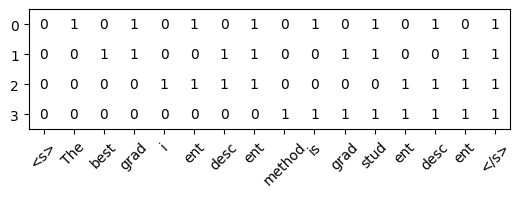

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

num_tokens = 16
model_size = 4

bits = np.zeros((model_size, num_tokens), dtype="int")

ax.imshow(np.full((model_size, num_tokens), np.nan), cmap="binary", interpolation='none')

for y in range(num_tokens):
    binary_representation = f"{int(bin(y)[2:]):04}"[::-1]

    for x in range(model_size):
        ax.text(y, x, binary_representation[x], ha="center", va="center")

        bits[x, y] = binary_representation[x]

ax.set_xticks(range(0, 16))

ax.set_xticklabels(
    ["<s>", "The", "best", "grad", "i", "ent", "desc", "ent", "method", "is", "grad", "stud", "ent", "desc", "ent", "</s>"],
    rotation=45,
)

fig.savefig(
    "../public/position_encoding_bits_1.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)


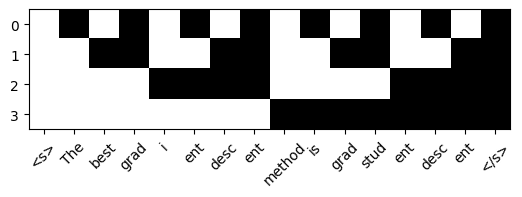

In [155]:

fig, ax = plt.subplots(1, 1, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

ax.imshow(bits, cmap="binary")

ax.set_xticks(range(0, 16))

ax.set_xticklabels(
    ["<s>", "The", "best", "grad", "i", "ent", "desc", "ent", "method", "is", "grad", "stud", "ent", "desc", "ent", "</s>"],
    rotation=45,
)

fig.savefig(
    "../public/position_encoding_bits_2.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)


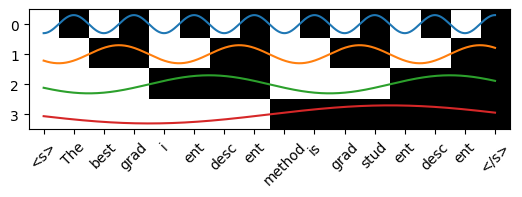

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

ax.imshow(bits, cmap="binary")

x_vals = np.linspace(0, 15, 1000)

ax.plot(x_vals, 0 + 0.3 * np.sin(2 * np.pi * (1 /  2) * x_vals + (1 /  2) * np.pi))
ax.plot(x_vals, 1 + 0.3 * np.sin(2 * np.pi * (1 /  4) * x_vals + (1 /  4) * np.pi))
ax.plot(x_vals, 2 + 0.3 * np.sin(2 * np.pi * (1 /  8) * x_vals + (1 /  8) * np.pi))
ax.plot(x_vals, 3 + 0.3 * np.sin(2 * np.pi * (1 / 16) * x_vals + (1 / 16) * np.pi))

ax.set_xticks(range(0, 16))

ax.set_xticklabels(
    ["<s>", "The", "best", "grad", "i", "ent", "desc", "ent", "method", "is", "grad", "stud", "ent", "desc", "ent", "</s>"],
    rotation=45,
)

fig.savefig(
    "../public/position_encoding_bits_3.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)


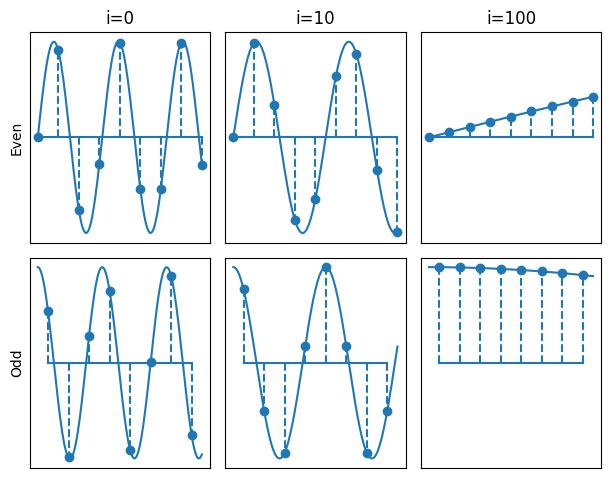

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

cmap = plt.get_cmap("tab20")

max_seq_idx = 16

for row_n, row_axes in enumerate(axes):
    for col_n, ax in enumerate(row_axes):
        func = np.sin if row_n == 0 else np.cos

        ax.set_xticks([])
        ax.set_yticks([])

        seq_i = 10**col_n - (1 if col_n == 0 else 0)

        vector_index = np.array([seq_i])
        seq_index = np.arange(0 if row_n == 0 else 1, max_seq_idx + 1, 2)

        ax.stem(
            seq_index,
            func(compute_argument(seq_index, vector_index)),
            "k",
            basefmt="C0",
            linefmt="--",
        )

        seq_index_continuous = np.arange(0, max_seq_idx + 0.1, 0.1)
        ax.plot(
            seq_index_continuous,
            func(compute_argument(seq_index_continuous, vector_index)),
            zorder=0,
            c=cmap(0),
        )

        if row_n == 0:
            ax.set_title(f"i={seq_i}")

        if col_n == 0 and row_n == 0:
            ax.set_ylabel("Even")
        elif col_n == 0 and row_n == 1:
            ax.set_ylabel("Odd")

plt.tight_layout()


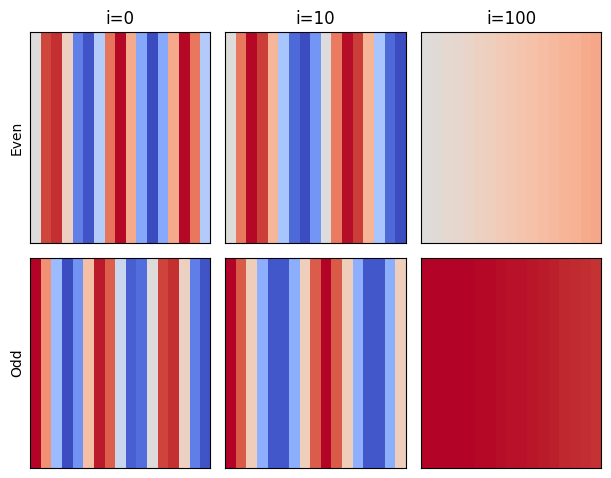

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

cmap = plt.get_cmap("coolwarm")

max_seq_idx = 16

for row_n, row_axes in enumerate(axes):
    for col_n, ax in enumerate(row_axes):
        func = np.sin if row_n == 0 else np.cos

        ax.set_xticks([])
        ax.set_yticks([])

        seq_i = 10**col_n - (1 if col_n == 0 else 0)

        vector_index = np.array([seq_i])
        seq_index = np.arange(0, max_seq_idx + 1)

        embeddings = func(compute_argument(seq_index, vector_index))[np.newaxis, :]

        ax.imshow(
            embeddings,
            aspect="auto",
            vmin=-1,
            vmax=1,
            cmap=cmap,
        )

        if row_n == 0:
            ax.set_title(f"i={seq_i}")

        if col_n == 0 and row_n == 0:
            ax.set_ylabel("Even")
        elif col_n == 0 and row_n == 1:
            ax.set_ylabel("Odd")

plt.tight_layout()


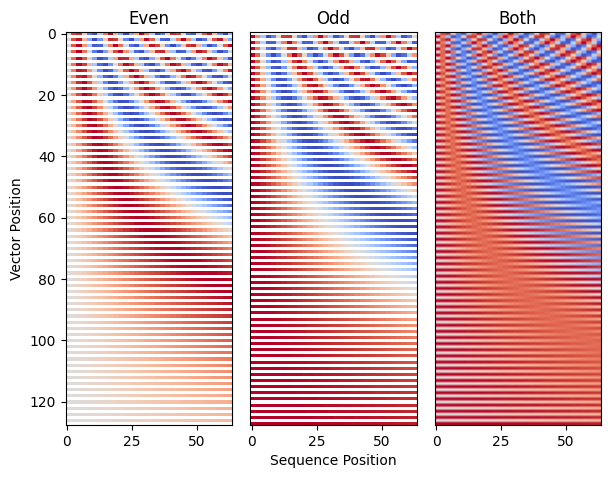

In [166]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("coolwarm")
#cmap.set_bad("white")

fig, axes = plt.subplots(1, 3, figsize=(6.2125984, 4.88189))

vector_index = np.arange(0, 128)
seq_index = np.arange(0, 64)

xx, yy = np.meshgrid(seq_index, vector_index)

args = compute_argument(xx // 2, yy)

even = np.sin(args)
odds = np.cos(args)
aggregate = np.empty_like(even)

aggregate[0::2, :] = even[0::2, :]
aggregate[1::2, :] = odds[1::2, :]

even[1::2, :] = np.nan
odds[0::2, :] = np.nan

axes[0].imshow(
    even,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap=cmap,
    interpolation="nearest",
)
# axes[0].set_xticks([])
# axes[0].set_yticks([])
axes[0].set_title("Even")

axes[1].imshow(
    odds,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap=cmap,
    interpolation="nearest",
)
# axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title("Odd")

axes[2].imshow(
    aggregate,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap=cmap,
)
# axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title("Both")

axes[1].set_xlabel("Sequence Position")
axes[0].set_ylabel("Vector Position")

plt.tight_layout()

fig.savefig(
    "../public/position_encoding_sinusoid_3.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)


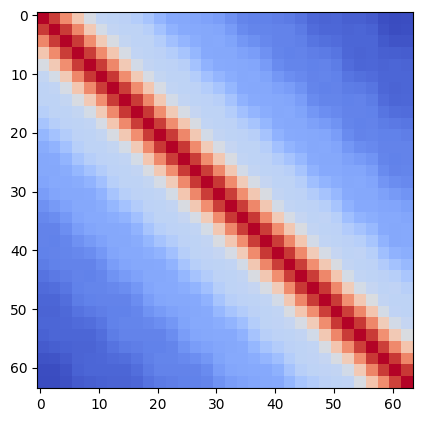

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(6.2125984, 4.88189))

vector_index = np.arange(0, d)
seq_index = np.arange(0, T)

xx, yy = np.meshgrid(seq_index, vector_index)

args = compute_argument(xx // 2, yy)

even = np.sin(args)
odds = np.cos(args)
aggregate = np.empty_like(even)

aggregate[0::2, :] = even[0::2, :]
aggregate[1::2, :] = odds[1::2, :]

cos_dist = (aggregate.T @ aggregate) / np.power(np.linalg.norm(aggregate, axis=0), 2)

ax.imshow(
    cos_dist,
    # vmin=-1,
    # vmax=1,
    cmap="coolwarm",
)

fig.savefig(
    "../public/position_encoding_sinusoid_relative.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)
